In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 29003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=3>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2        1 / cm                                     
 float64   float64 float64 int64 float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- -------- ----- ----- ----- -------- --------
85951.7868  0.1322 -5.9777     3 888.8789    51 29003   304 25 62025 26 52126
85951.9069  0.1322  -5.961     3 888.8789    53 29003   304 25 62026 26 52127
85951.9117  0.1322 -5.9944     3 888.8789    49 29003   304 25 62024 26 52125, <Table length=6>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2        1 / cm                                     
 float64   float64 float64 int64 float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- -------- ----- ----- ----- -------- --------
87527.2695  0.0152 -4.9073     3 187.7136    21 29003   304 11 3 810 12 21111
87527.3079  0.0152 -4.8344  

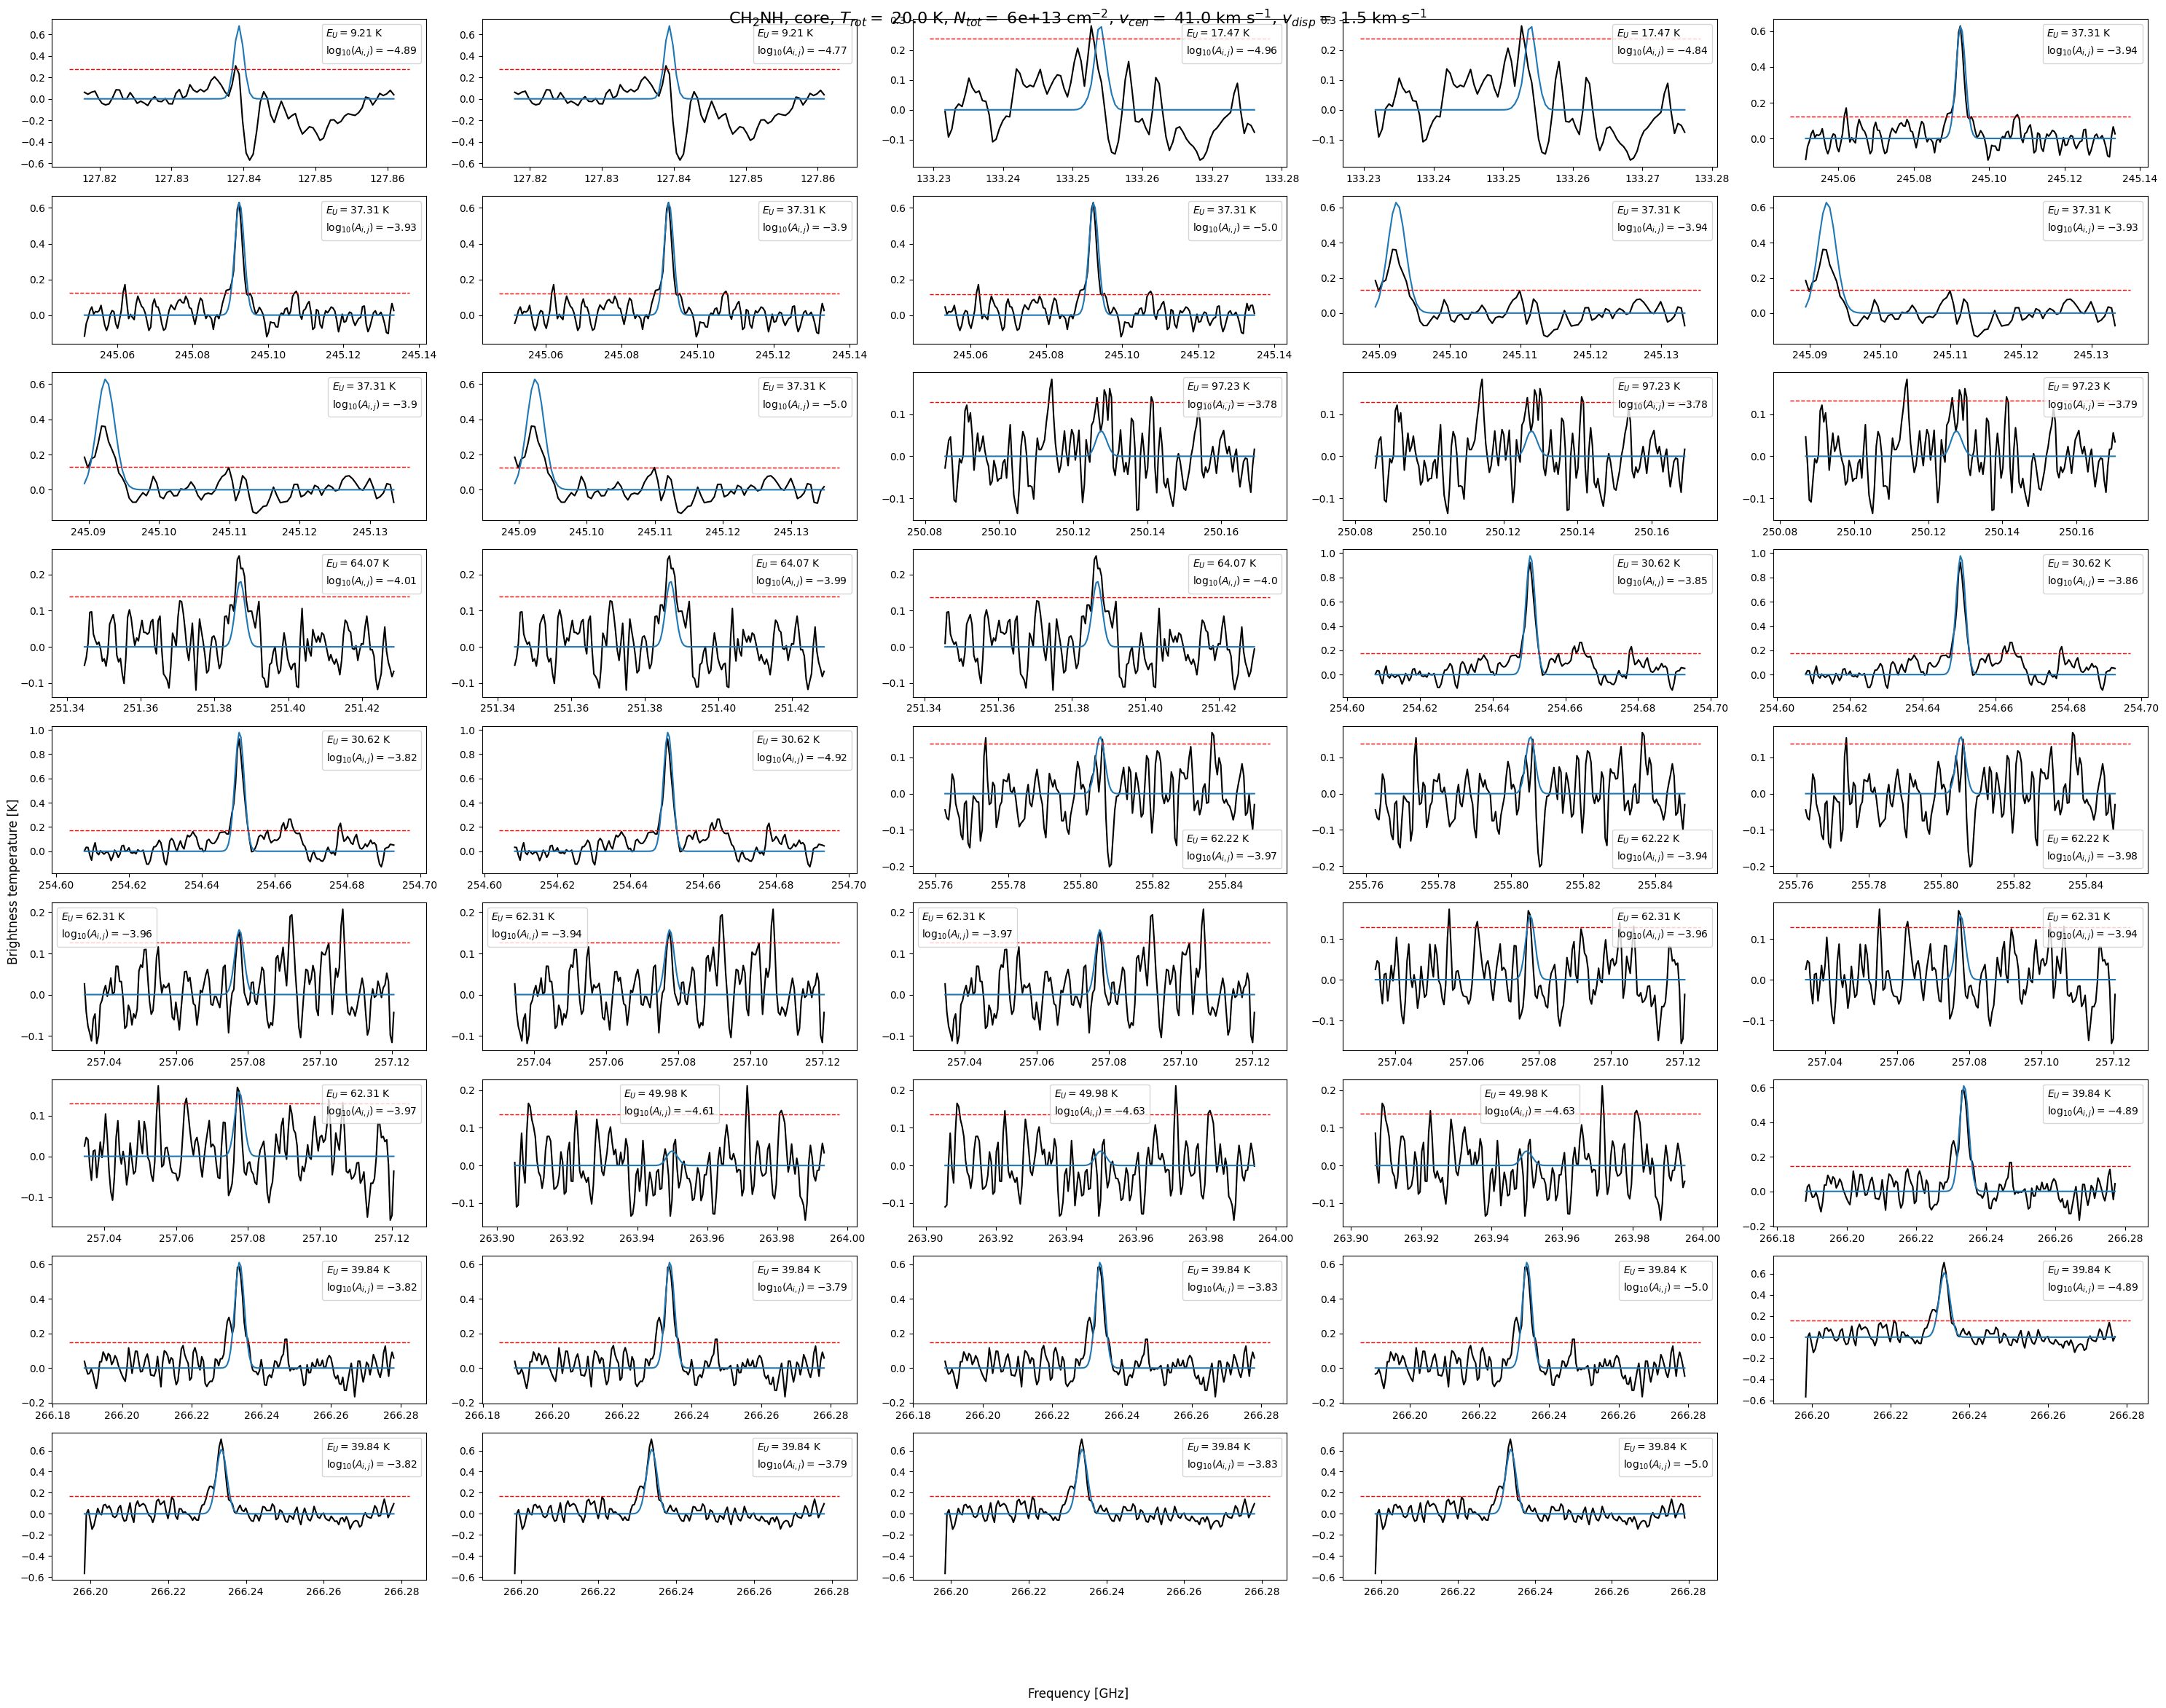

In [20]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 20., N_tot = 6.0e+13, v_cen = 41.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=30, fig_height=25, 
               nrows=10, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'CH$_2$NH', extr_type="coord", crd=crd, 
               EU_cutoff_K=100, aij_cutoff=-5, show_2_sigma=True)

In [21]:
# Get subcubes based on mask
cubes_masked, reg = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False, return_mask=True)

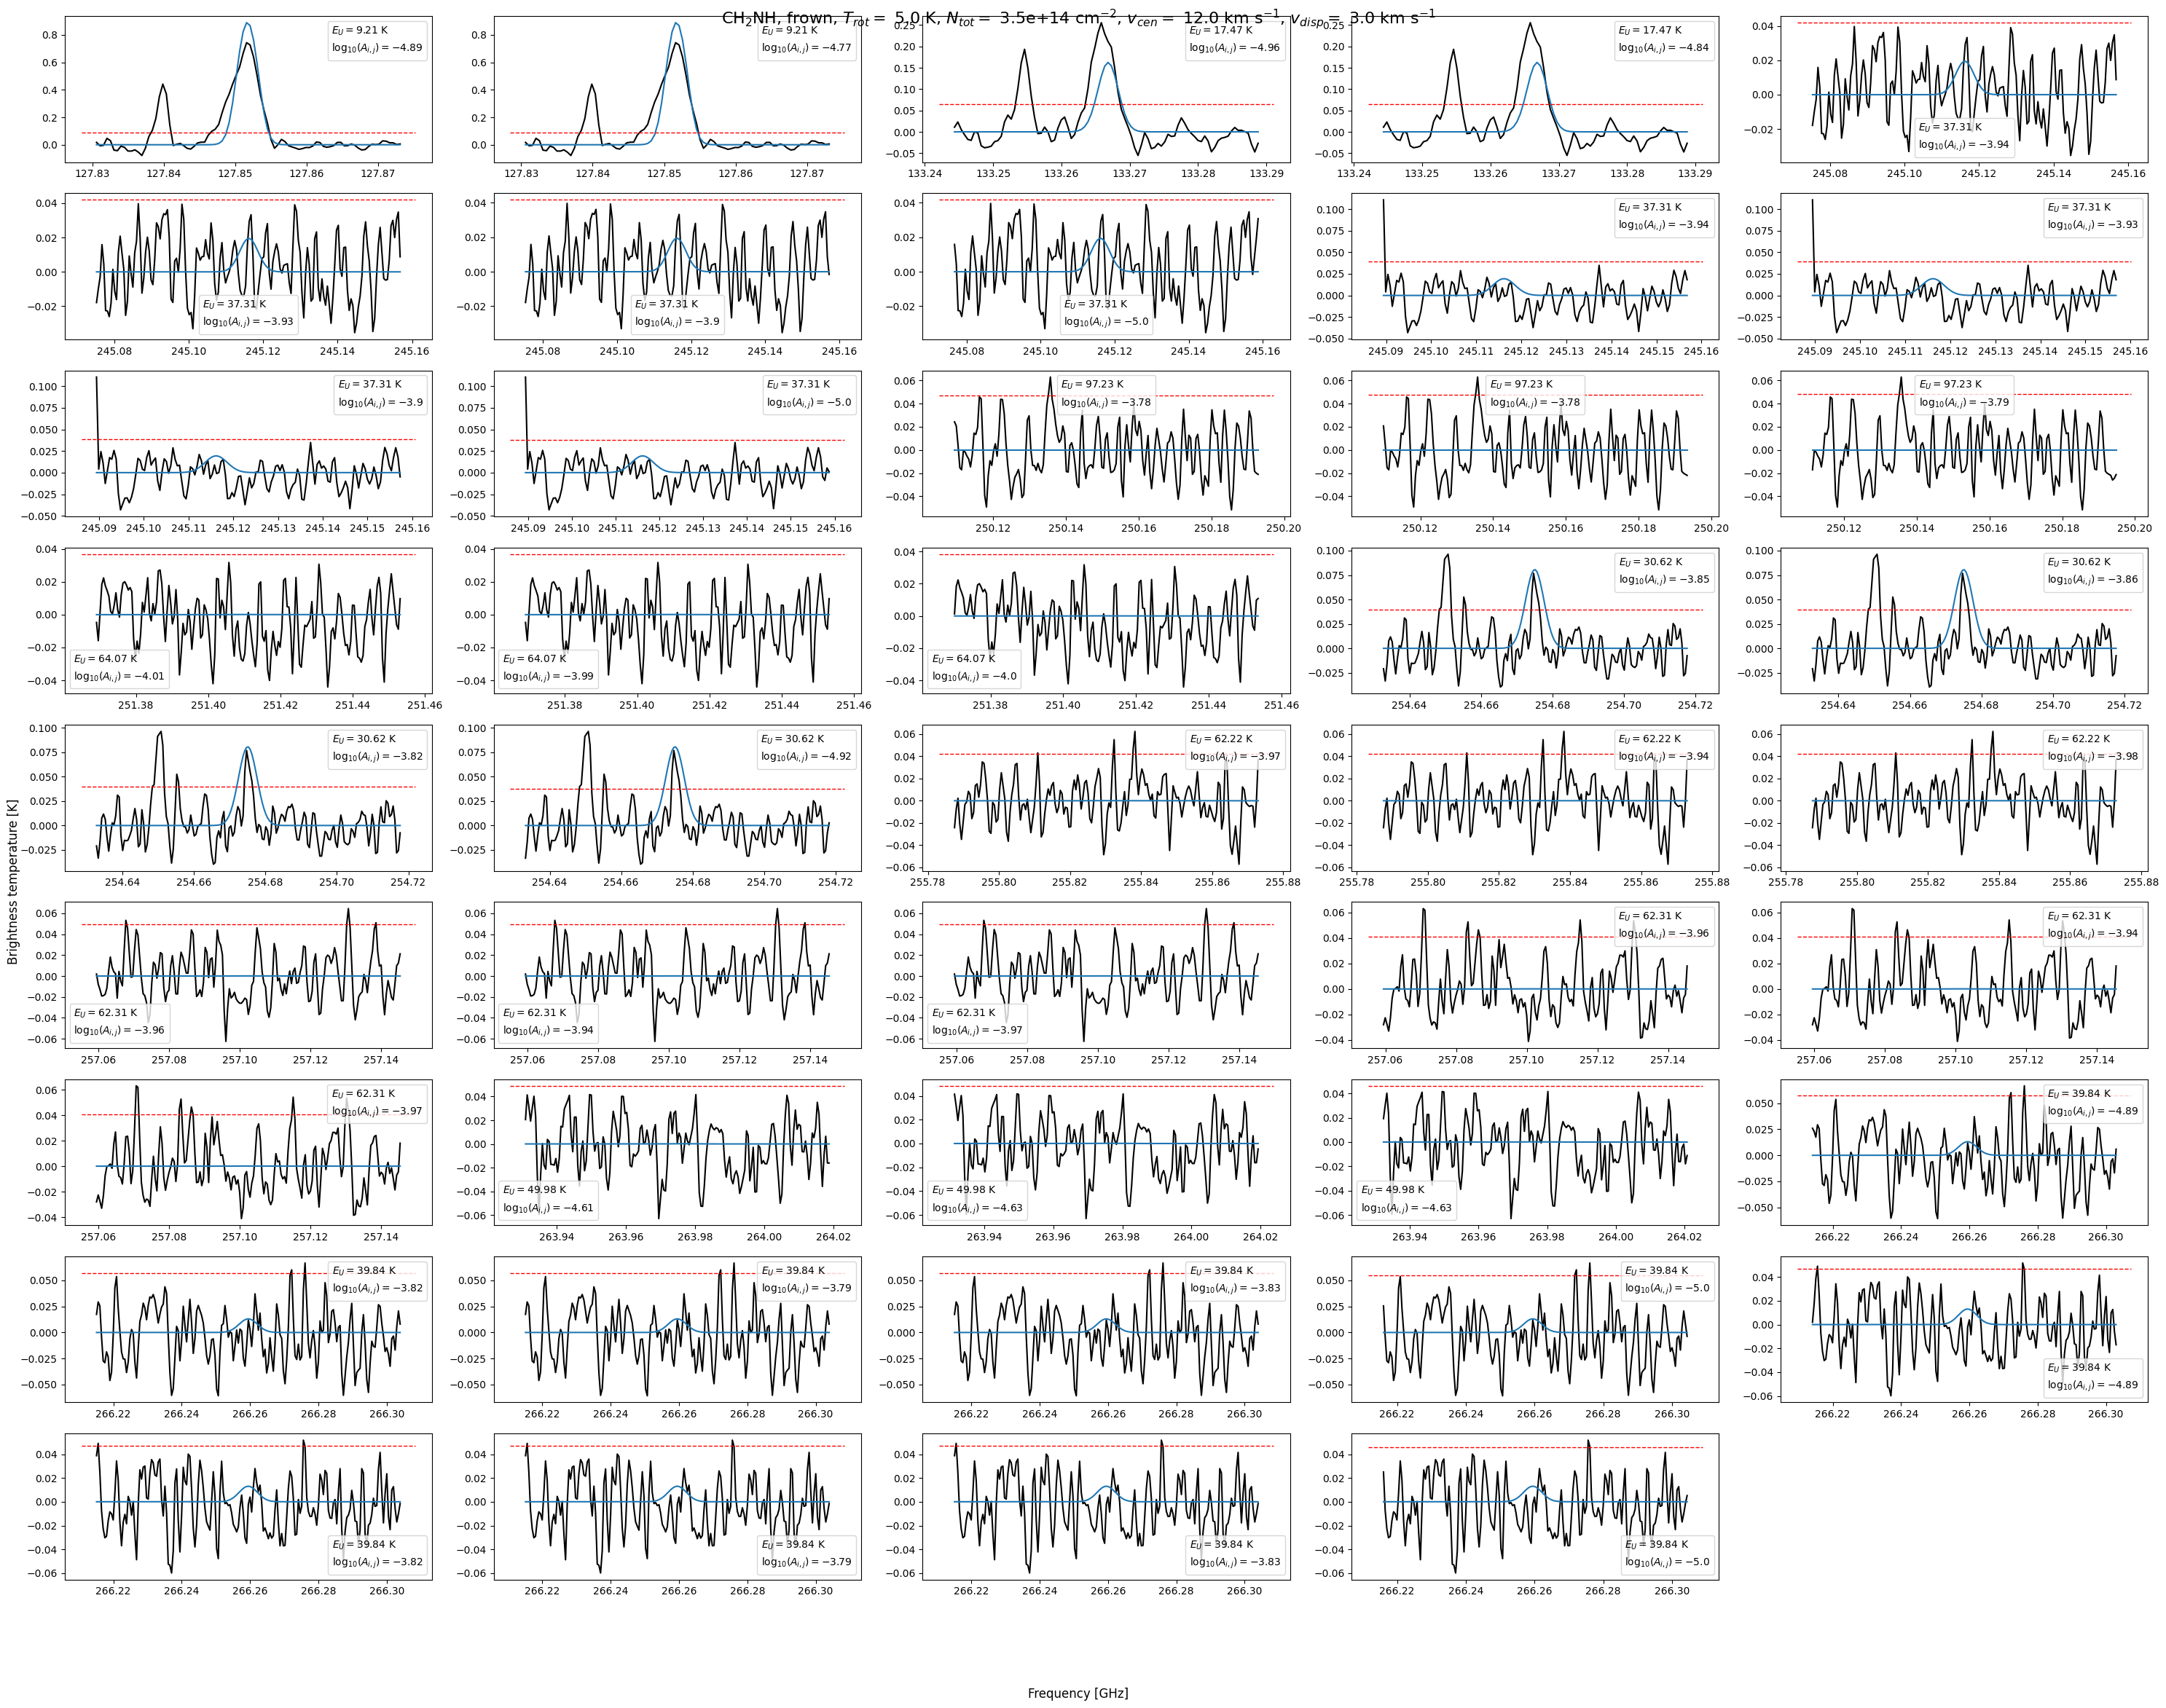

In [36]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes_masked, temp = 5., N_tot = 3.5e+14, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=30, fig_height=25, 
               nrows=10, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_2$NH', extr_type="reg", 
               just_data=False, EU_cutoff_K=100, aij_cutoff=-5, show_2_sigma=True)

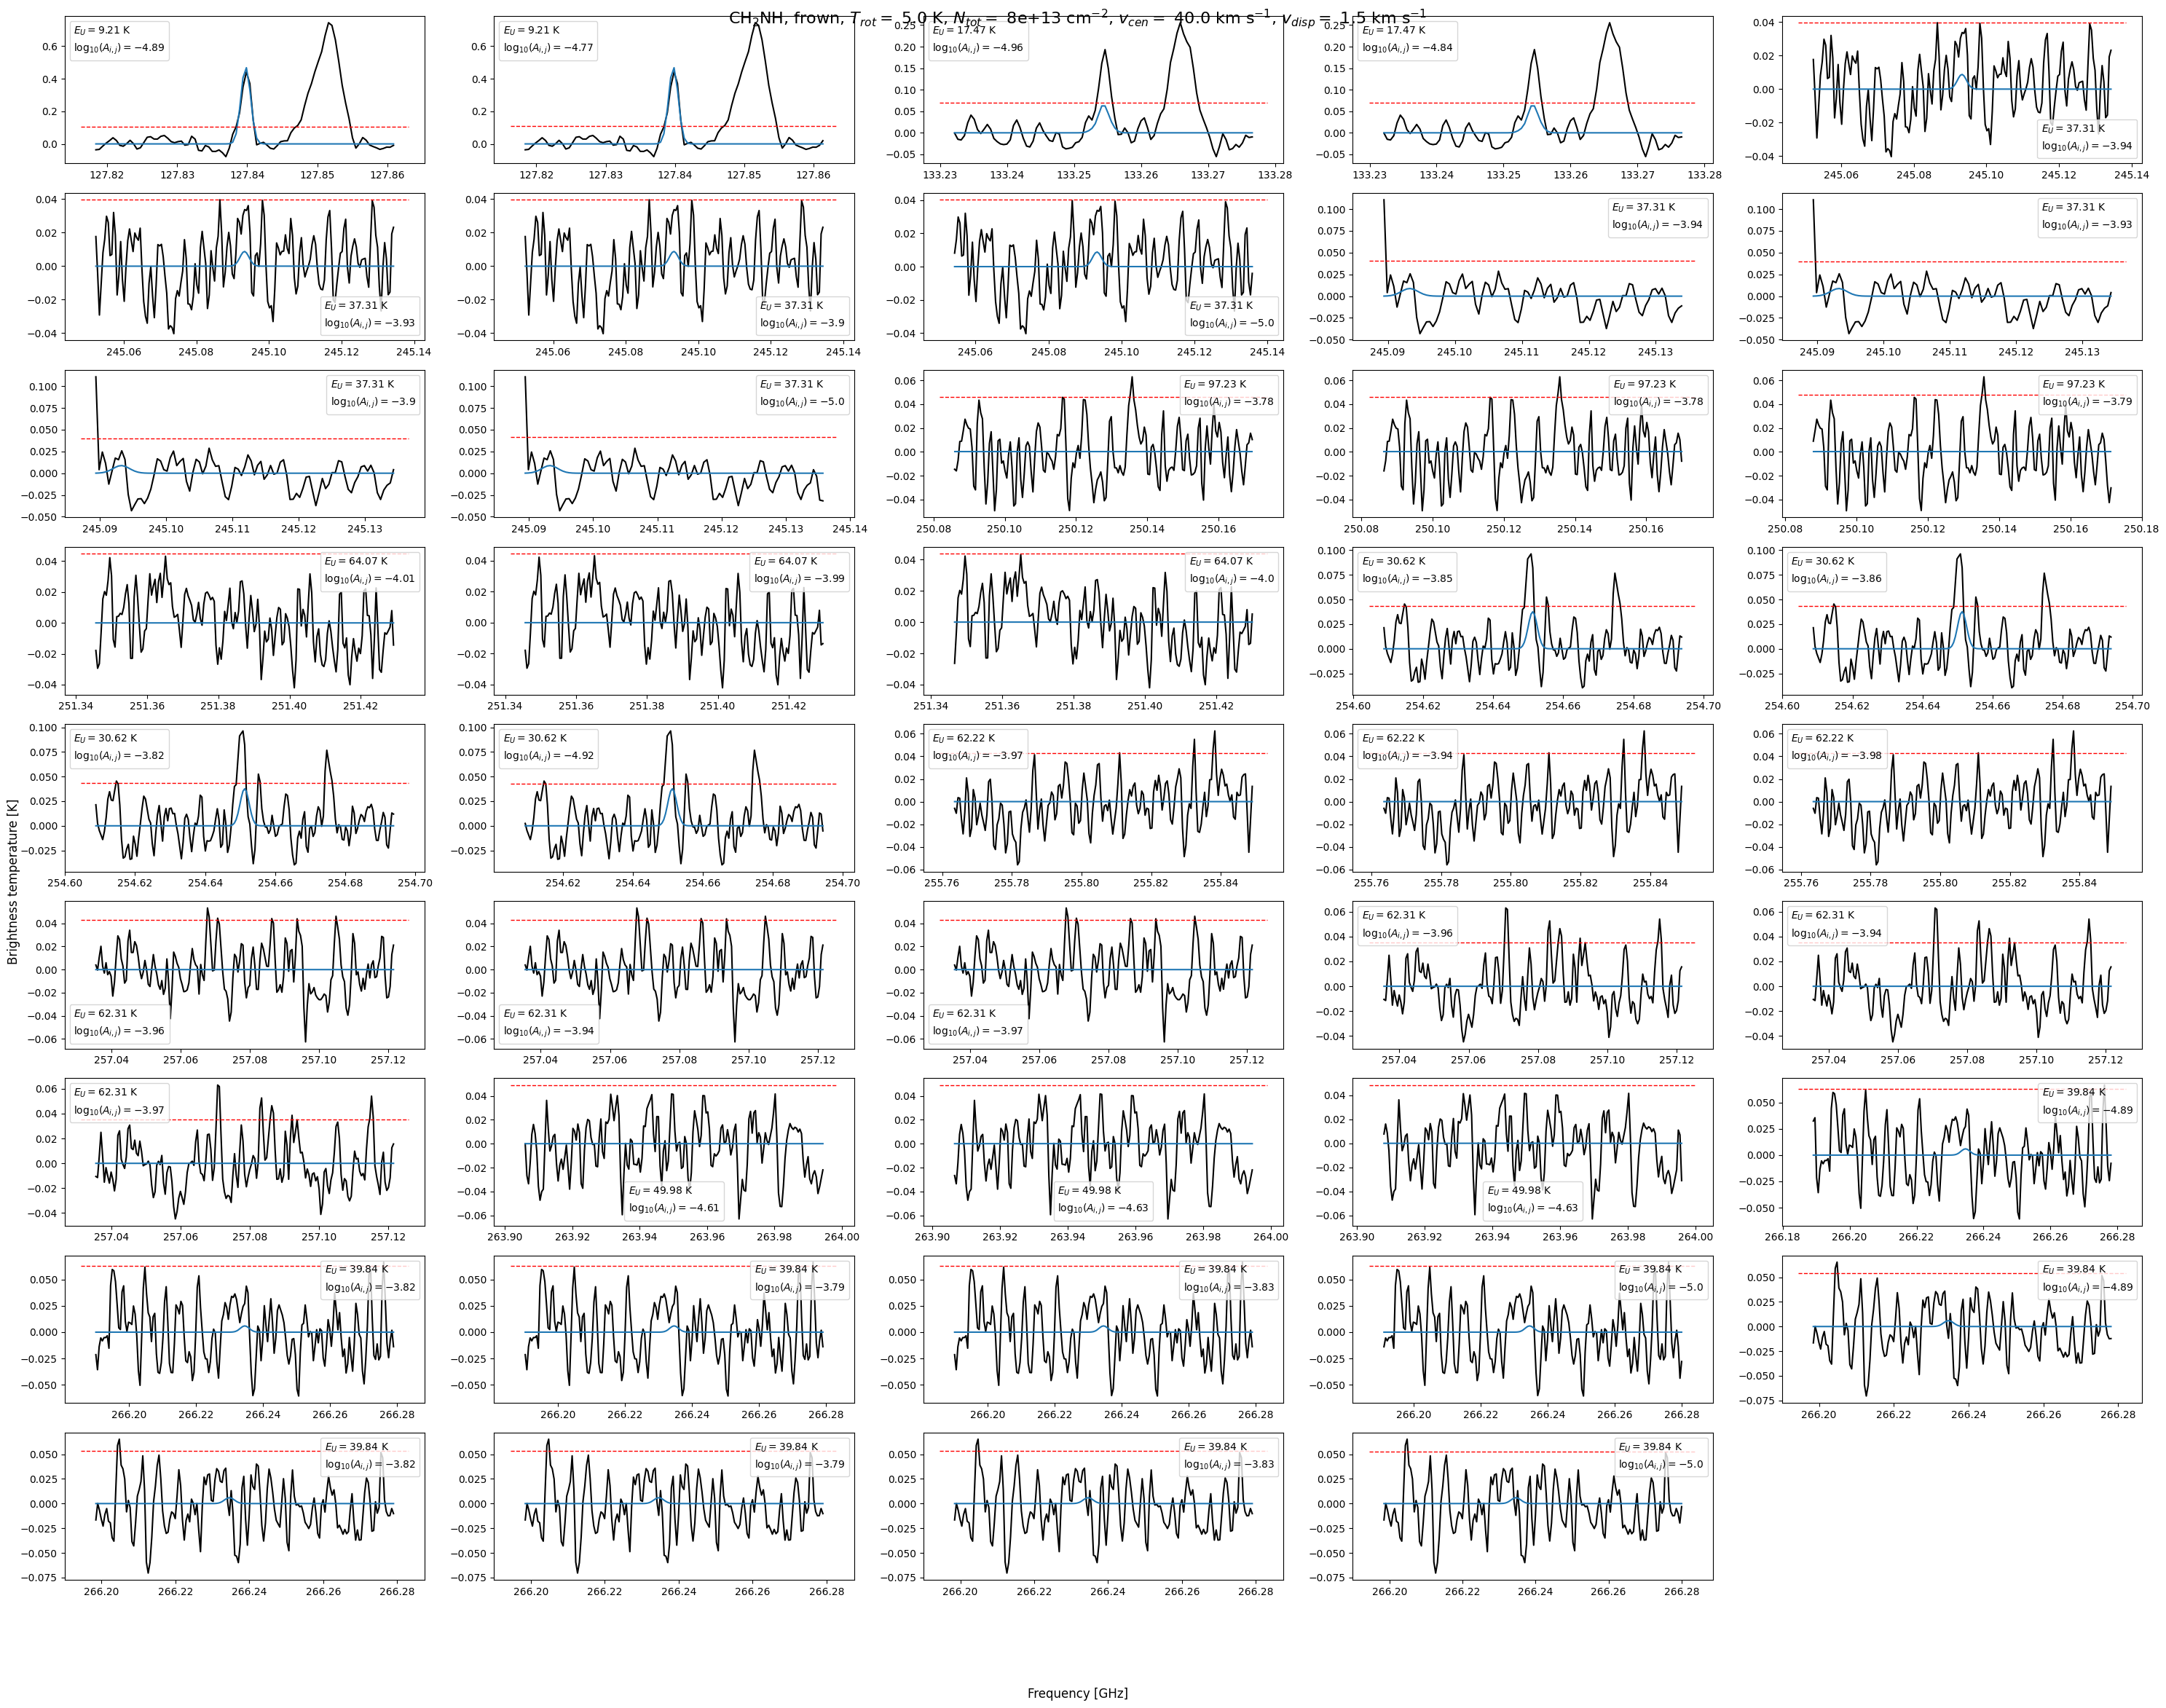

In [45]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 5., N_tot = 8.0e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=30, fig_height=25, 
                       nrows=10, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_2$NH', extr_type="reg", 
                       just_data=False, EU_cutoff_K=100, aij_cutoff=-5, show_2_sigma=True, return_freqs=True)

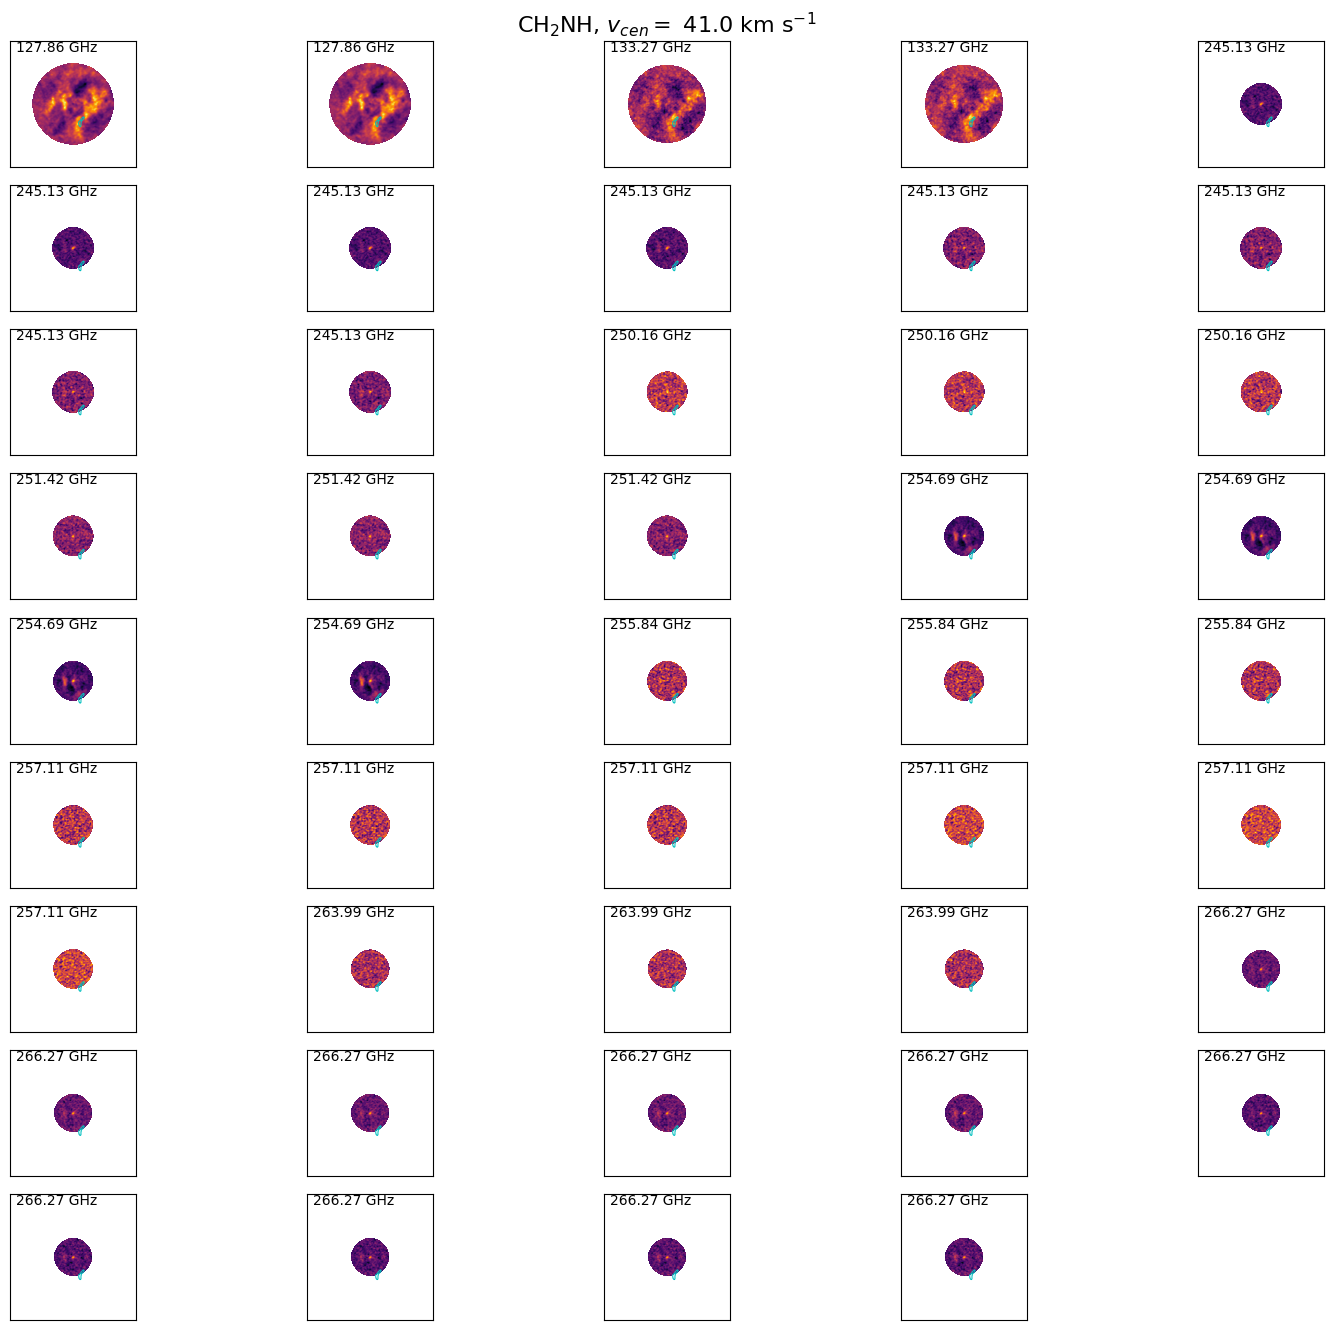

In [31]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=41*u.km/u.s, fig_width=15, fig_height=15, nrows=10, ncols=5, name_for_plot=f'CH$_2$NH', reg=reg)

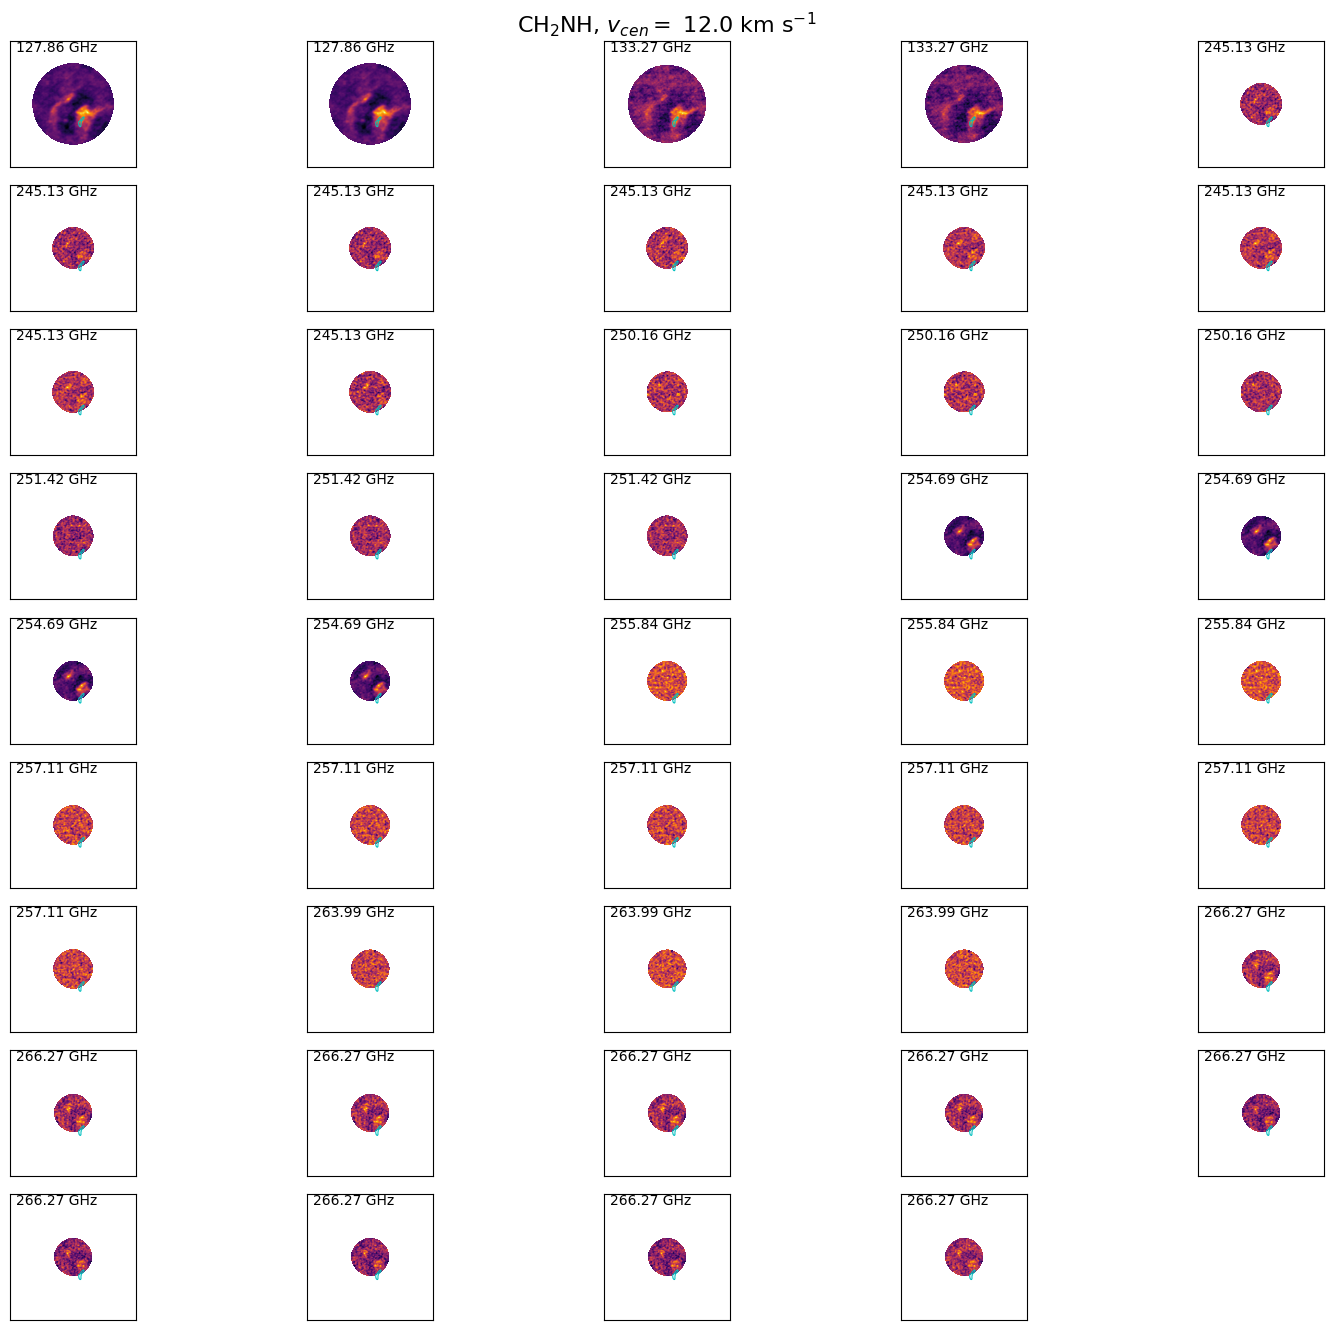

In [32]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=15, fig_height=15, nrows=10, ncols=5, name_for_plot=f'CH$_2$NH', reg=reg)